<a href="https://colab.research.google.com/github/tsubametsai/Boss-you-have-been-fired.-Why-do-employees-choose-to-leave-Evidence-from-decision-tree-analysis/blob/main/HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pydot
import pydotplus as pydot
from IPython.display import Image
from six import StringIO

from bokeh.io import output_notebook
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook',palette='deep')
np.random.seed(seed=2)

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
#導入中文字體
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  
#檔案格式必須為UTF-8編碼
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-03-01 14:20:01--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.136.102, 142.250.136.100, 142.250.136.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.136.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rtm7v2o0bdnbbsg5vpi38jk0dactngqq/1646144400000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-03-01 14:20:04--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rtm7v2o0bdnbbsg5vpi38jk0dactngqq/1646144400000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.121.132, 2607:f8b0:4001:c19::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|108.177.1

In [ ]:
import matplotlib.font_manager
 
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
 
for i in a:
    print(i)

DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif Display
Humor Sans
Liberation Mono
Liberation Mono
Liberation Mono
Liberation Mono
Liberation Sans
Liberation Sans
Liberation Sans
Liberation Sans
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Serif
Liberation Serif
Liberation Serif
Liberation Serif
STIXGeneral
STIXGeneral
STIXGeneral
STIXGeneral
STIXNonUnicode
STIXNonUnicode
STIXNonUnicode
STIXNonUnicode
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeFourSym
STIXSizeOneSym
STIXSizeOneSym
STIXSizeThreeSym
STIXSizeThreeSym
STIXSizeTwoSym
STIXSizeTwoSym
Taipei Sans TC Beta
cmb10
cmex10
cmmi10
cmr10
cmss10
cmsy10
cmtt10


In [ ]:
	
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/tsubametsai/HR/main/HR_comma_sep.csv")

In [ ]:
dataset.shape

(14937, 11)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tsubametsai/HR/main/HR_comma_sep.csv', index_col=0)


In [ ]:
df.drop(df.columns[df.columns.str.contains('Unnamed:0',case = False)],axis = 1, inplace = True)

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
dataset.head()

,Unnamed: 0,員工滿意度,雇主評分,工作項目,每月工作時數,工作年資,工傷紀錄,在職中,近5年升遷,職務,薪資
0,1,0.38,0.53,2,157,3,0,1,0,業務,1
1,2,0.80,0.86,5,262,6,0,1,0,業務,2
2,3,0.11,0.88,7,272,4,0,1,0,業務,2
3,4,0.72,0.87,5,223,5,0,1,0,業務,1
4,5,0.76,0.89,5,262,5,0,1,0,業務,1


In [ ]:
dataset.isnull().any()

Unnamed: 0    False
員工滿意度         False
雇主評分          False
工作項目          False
每月工作時數        False
工作年資          False
工傷紀錄          False
在職中           False
近5年升遷         False
職務            False
薪資            False
dtype: bool

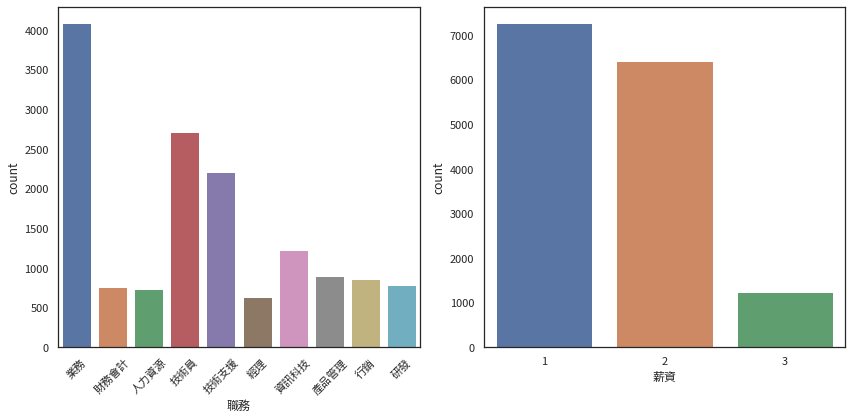

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(12,6))
g = sns.countplot(dataset["職務"], ax = axs[0])
plt.setp(g.get_xticklabels(), rotation = 45)
g = sns.countplot(dataset["薪資"], ax = axs[1])
plt.tight_layout()
plt.show();

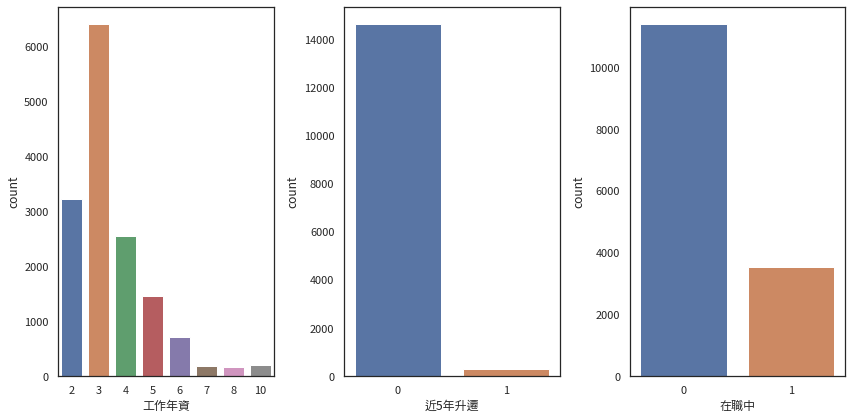

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(12,6))
sns.countplot(dataset["工作年資"], ax=axs[0])
sns.countplot(dataset["近5年升遷"], ax=axs[1])
sns.countplot(dataset["在職中"], ax=axs[2])
plt.tight_layout()
plt.show();

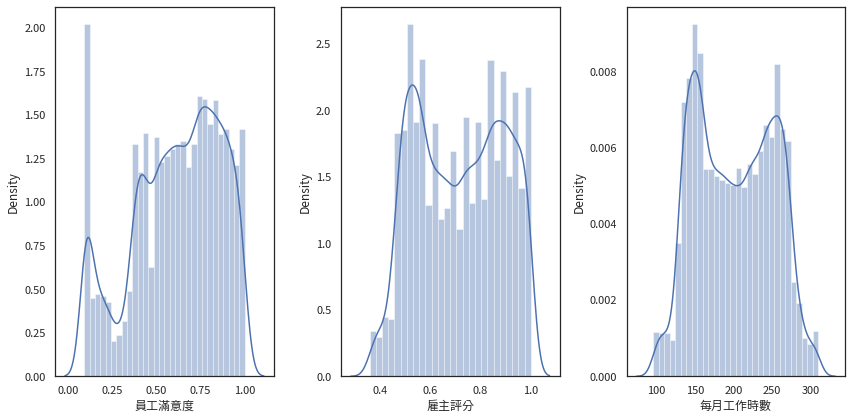

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(12,6))
sns.distplot(dataset["員工滿意度"], ax = axs[0])
sns.distplot(dataset["雇主評分"], ax = axs[1])
sns.distplot(dataset["每月工作時數"], ax=axs[2])
plt.tight_layout()
plt.show();

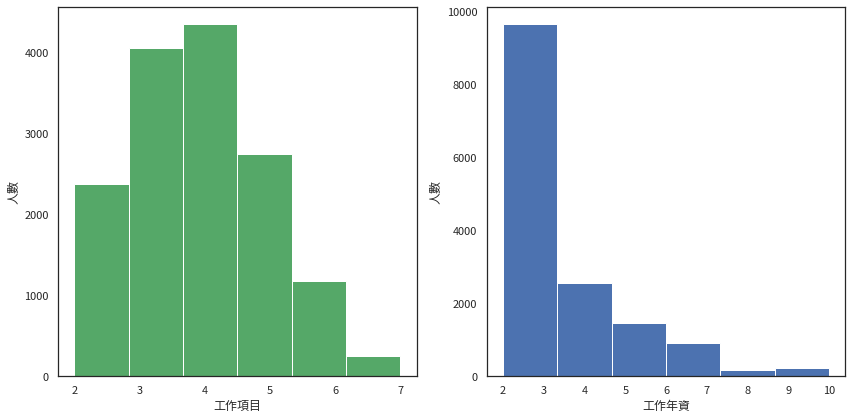

In [ ]:
fig,axs = plt.subplots(ncols=2, figsize=(12,6))
axs[0].hist(dataset["工作項目"], bins=6, color="g")
axs[0].set_xlabel("工作項目")
axs[0].set_ylabel("人數")
axs[1].hist(dataset["工作年資"], bins=6, color="b")
axs[1].set_xlabel("工作年資")
axs[1].set_ylabel("人數")
plt.tight_layout()
plt.show();

In [ ]:
dataset = dataset.drop(labels=["Unnamed: 0"],axis=1)

In [ ]:
dataset.head()

,員工滿意度,雇主評分,工作項目,每月工作時數,工作年資,工傷紀錄,在職中,近5年升遷,職務,薪資
0,0.38,0.53,2,157,3,0,1,0,業務,1
1,0.80,0.86,5,262,6,0,1,0,業務,2
2,0.11,0.88,7,272,4,0,1,0,業務,2
3,0.72,0.87,5,223,5,0,1,0,業務,1
4,0.76,0.89,5,262,5,0,1,0,業務,1


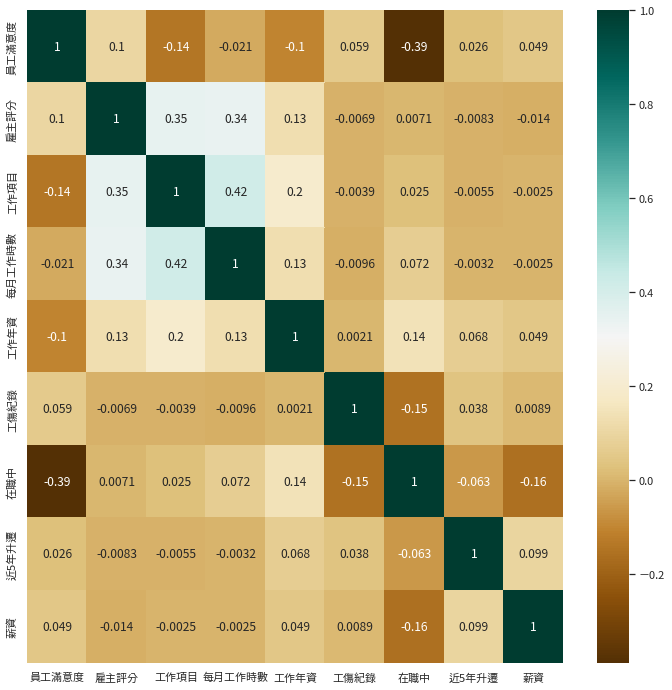

In [ ]:
plt.figure(figsize=(12, 12))
g = sns.heatmap(dataset.corr(), annot=True, cmap="BrBG")

In [ ]:
dataset = dataset.drop(labels=["職務"],axis=1)

In [ ]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from sklearn import datasets, manifold
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import Isomap

In [ ]:
N = StandardScaler()
N.fit(dataset)
dataset_norm = N.transform(dataset)

In [ ]:
index = np.random.randint(0, dataset_norm.shape[0], size=15000)

In [ ]:
df.isnull().any().any() #檢查是否有NaN值

False

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
pca = PCA(n_components=9)
pca_representation = pca.fit_transform(dataset_norm[index])

In [ ]:
import numpy as np
from sklearn.datasets import make_s_curve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import Isomap
iso = Isomap(n_components=9,n_neighbors=100)
iso_representation = pca.fit_transform(dataset_norm[index])

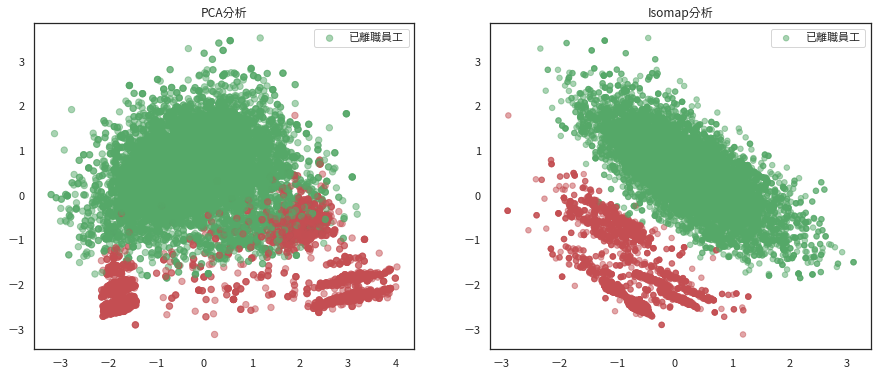

In [ ]:
left_colors = dataset["在職中"].map(lambda s : "g" if s==0 else "r")
fig,axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(pca_representation[:,0],pca_representation[:,1],
c = left_colors[index],alpha=0.5, s = 40)
axes[0].set_title("PCA分析")
axes[0].legend(["已離職員工"])

axes[1].scatter(iso_representation[:,6], iso_representation[:,1],
c = left_colors[index],alpha=0.5, s = 30)
axes[1].set_title("Isomap分析")
axes[1].legend(["已離職員工"]);

In [ ]:
source_dataset = ColumnDataSource(
        data = dict(
            x = iso_representation[:2000,0],
            y = iso_representation[:2000,1],
            desc = dataset.loc[index,"在職中"],
            colors = ["#%02x%02x%02x" % (int(c*255), int((1-c)*255), 0) 
            for c in dataset.loc[index,"在職中"]],
            satisfaction_level = dataset.loc[index,'員工滿意度'],
            last_evaluation = dataset.loc[index,'雇主評分'],
            number_project = dataset.loc[index,'工作項目'],
            time_spend_company = dataset.loc[index,'工作年資'],
            average_montly_hours = dataset.loc[index,'每月工作時數']))
hover = HoverTool(tooltips=[("Left", "@在職中"), 
                       ("Satisf.level", "@員工滿意度"),
                       ("projects", "@工作項目"), 
                       ("Last eval.", "@雇主評分"),
                       ("Time in Company", "@工作年資"),
                       ("Montly hrs", "@每月工作時數")])
tools_isomap = [hover, "box_zoom",'pan', 'wheel_zoom', 'reset']

plot_isomap = figure(plot_width= 800, plot_height=600, tools=tools_isomap, 
                     title='Isomap projection of employee data')
plot_isomap.scatter('x', 'y', size=7, fill_color = "colors", line_color = None,
                    fill_alpha = 0.6, radius=0.1, alpha=0.5, line_width=0,
                    source=source_dataset)
show(plot_isomap)

In [ ]:
data_stay = dataset[dataset["在職中"]==0]
data_left = dataset[dataset["在職中"]==1]

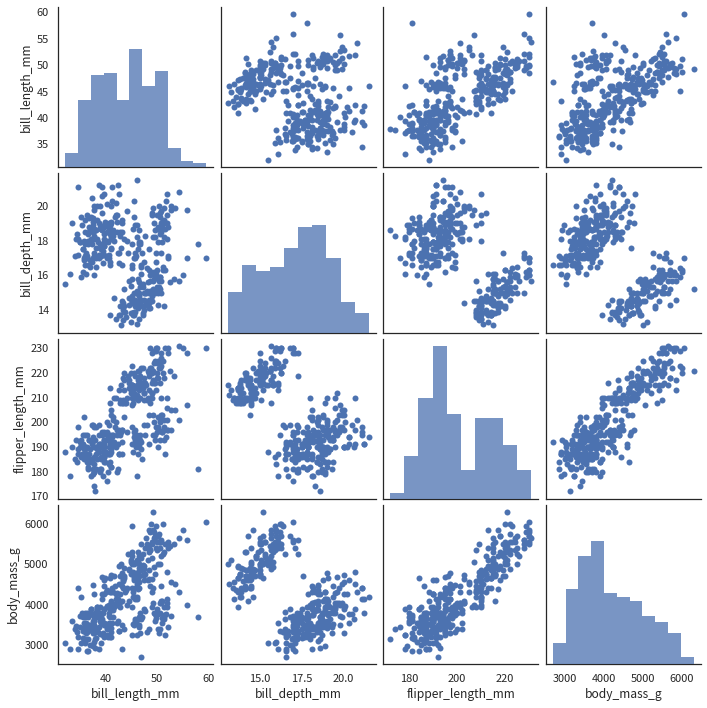

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")
sns.pairplot(penguins, diag_kws={'linewidth': 0}, plot_kws={'linewidth': 0})
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
員工滿意度,14937.0,0.612984,0.248773,0.09,0.44,0.64,0.82,1.0
雇主評分,14937.0,0.716211,0.171077,0.36,0.56,0.72,0.87,1.0
工作項目,14937.0,3.803910,1.232609,2.00,3.00,4.00,5.00,7.0
每月工作時數,14937.0,201.053826,49.952723,96.00,156.00,200.00,245.00,310.0
工作年資,14937.0,3.499163,1.461528,2.00,3.00,3.00,4.00,10.0
工傷紀錄,14937.0,0.144674,0.351784,0.00,0.00,0.00,0.00,1.0
在職中,14937.0,0.237531,0.425584,0.00,0.00,0.00,0.00,1.0
近5年升遷,14937.0,0.021289,0.144352,0.00,0.00,0.00,0.00,1.0
薪資,14937.0,1.595635,0.637581,1.00,1.00,2.00,2.00,3.0


TypeError: ignored

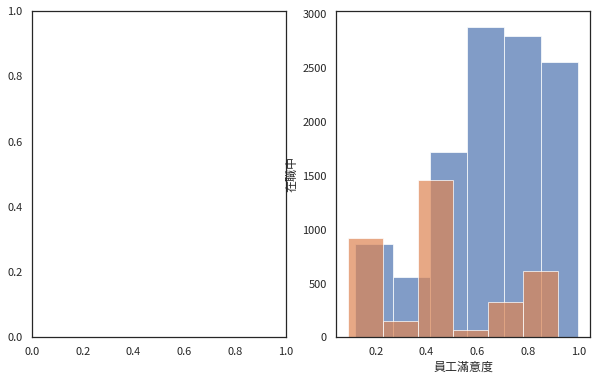

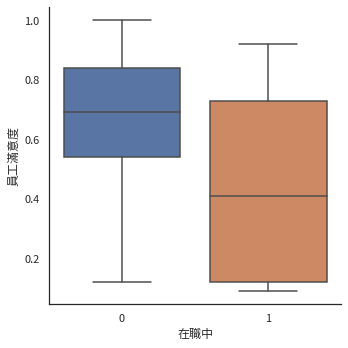

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
normal_samples = np.random.normal(size = 14937) 
sns.factorplot(y="員工滿意度",x="在職中",data=dataset,kind="box", ax=axs[0])
axs[1].hist(data_stay["員工滿意度"],bins=6,label="在職中",alpha=0.7)
axs[1].hist(data_left["員工滿意度"],bins=6,label="已離職",alpha=0.7)
axs[1].set_xlabel("員工滿意度")
axs[1].set_ylabel("在職中")
axs[1].legend(0);
  
plt.tight_layout();
plt.gcf().clear();

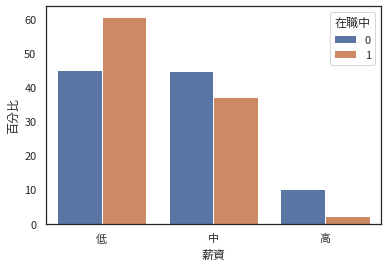

In [ ]:
salary_counts = (dataset.groupby(['在職中'])['薪資']
                    .value_counts(normalize=True)
                    .rename('百分比')
                    .mul(100)
                    .reset_index())
p = sns.barplot(x="薪資",y="百分比",hue="在職中",data=salary_counts)
p.set_ylabel("百分比")
p = p.set_xticklabels(["低","中","高"])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=3)
kmeans.fit(data_left[["員工滿意度","雇主評分"]])

KMeans(n_clusters=3, random_state=3)

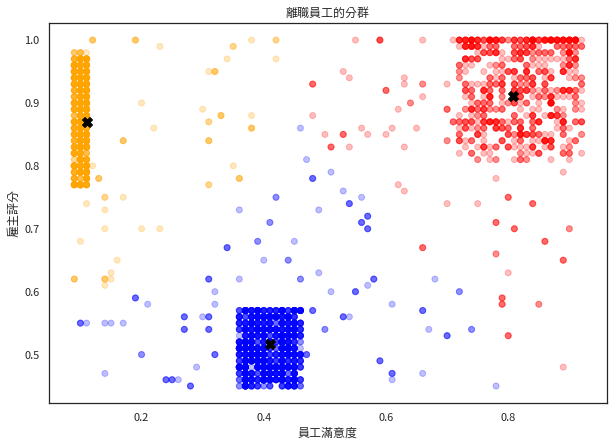

In [ ]:
kmeans_colors = ['red' if c == 0 else 'orange' if c == 2 else 'blue' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 7))
plt.scatter(x="員工滿意度",y="雇主評分", data=data_left,
            alpha=0.25,color = kmeans_colors)
plt.xlabel("員工滿意度")
plt.ylabel("雇主評分")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("離職員工的分群")

plt.show()

In [ ]:
data_left_SuccessHappy = data_left[kmeans.labels_ == 0]
data_left_UnsuccessUnhappy = data_left[kmeans.labels_ == 1]
data_left_SuccessUnhappy = data_left[kmeans.labels_ == 2]

In [ ]:
data_left_SuccessUnhappy.shape

(941, 9)

In [ ]:
data_left_SuccessHappy.shape

(970, 9)

In [ ]:
data_left_UnsuccessUnhappy.shape


(1637, 9)

In [ ]:
X_train = dataset.drop(labels = "在職中", axis=1)
Y_train = dataset["在職中"]
train_features = X_train.columns

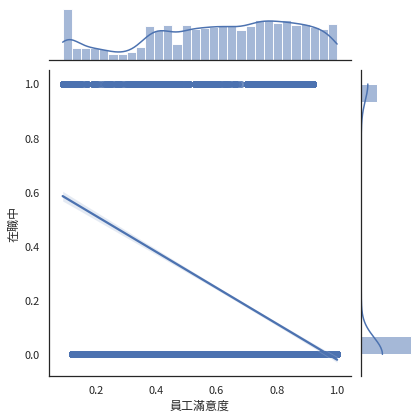

In [ ]:
sns.jointplot(x='員工滿意度', y='在職中', data=df, kind='reg')

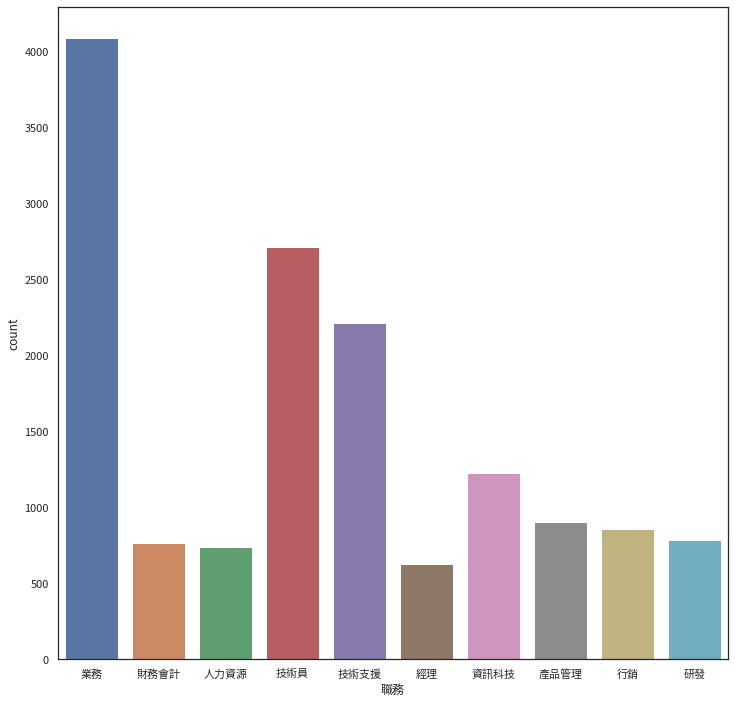

In [ ]:
plt.figure(figsize=(12, 12))
sns.countplot(x='職務', data=df)

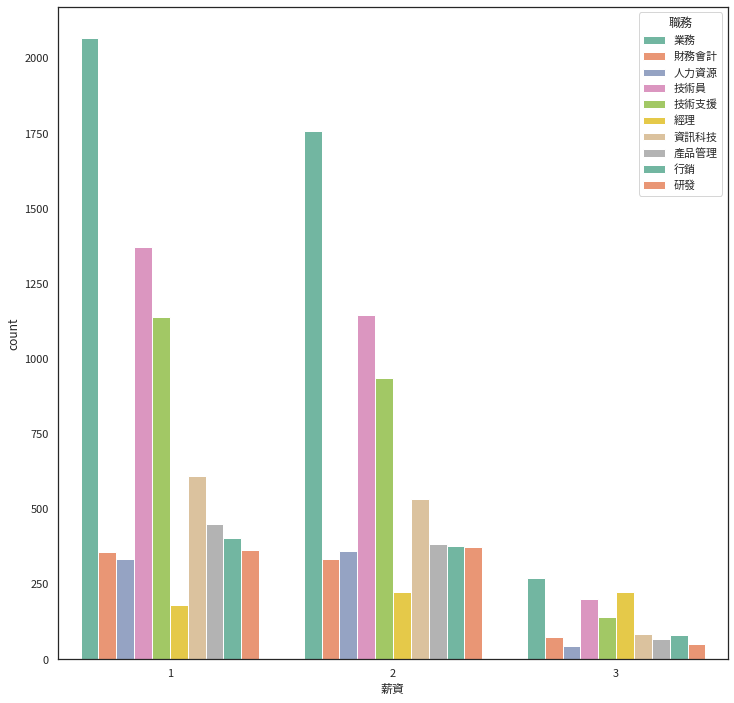

In [ ]:
plt.figure(figsize=(12, 12))
sns.countplot(x='薪資', hue='職務', data=df, palette='Set2')

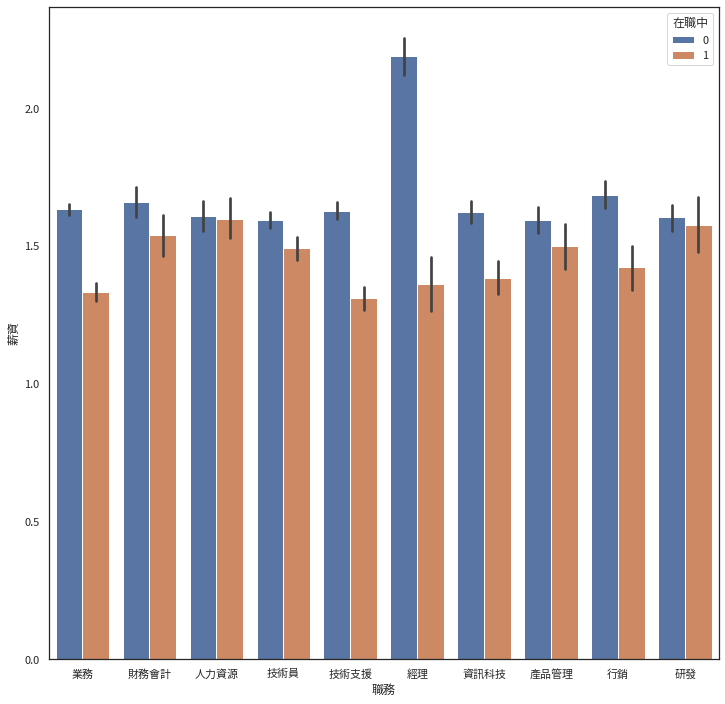

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x='職務', y='薪資', hue='在職中', data=df)


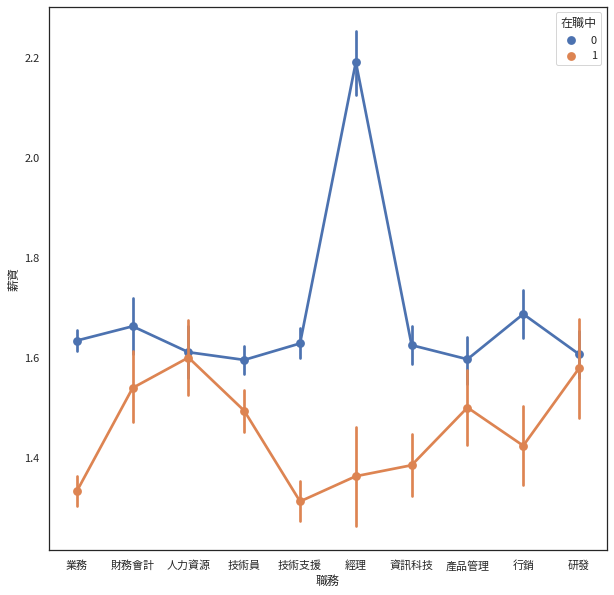

In [ ]:
plt.figure(figsize=(10, 10))
sns.pointplot(x='職務', y='薪資', hue='在職中', data=df)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
forest = RandomForestClassifier(1000)

In [ ]:
np.unique(df.職務)

array(['人力資源', '技術員', '技術支援', '業務', '產品管理', '研發', '經理', '行銷', '財務會計',
       '資訊科技'], dtype=object)

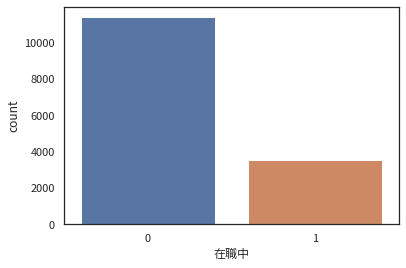

In [ ]:
sns.countplot(df.在職中)

In [ ]:
sales_dummies = pd.get_dummies(df.職務)

In [ ]:
df = df.drop(['職務'], 1).join(sales_dummies)

In [ ]:
X = df.drop(['在職中'], 1)
y = df.在職中
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [ ]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
importances = forest.feature_importances_

In [ ]:
print(f"模型準確度: {forest.score(X_test, y_test) * 100.}%")

模型準確度: 99.01829540383757%


In [ ]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

In [ ]:
indices = np.argsort(importances)[::-1]

In [ ]:
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 0 (0.320752)
2. feature 2 (0.180956)
3. feature 4 (0.177369)
4. feature 3 (0.155388)
5. feature 1 (0.122543)
6. feature 7 (0.011768)
7. feature 5 (0.009371)
8. feature 9 (0.003640)
9. feature 11 (0.003111)
10. feature 10 (0.002854)
11. feature 8 (0.001815)
12. feature 6 (0.001771)
13. feature 17 (0.001701)
14. feature 16 (0.001652)
15. feature 14 (0.001515)
16. feature 13 (0.001476)
17. feature 15 (0.001334)
18. feature 12 (0.000986)


In [ ]:
importances_df = pd.DataFrame(importances)
importances_df.columns=['1.員工滿意度, 2.工作年資, 3.工作項目, 4.每月工作時數, 5.雇主評分']
columns_df = pd.DataFrame(df.drop('在職中', 1).columns.tolist())
columns_df.columns=['影響變量']

In [ ]:
importances_df = importances_df.join(columns_df)

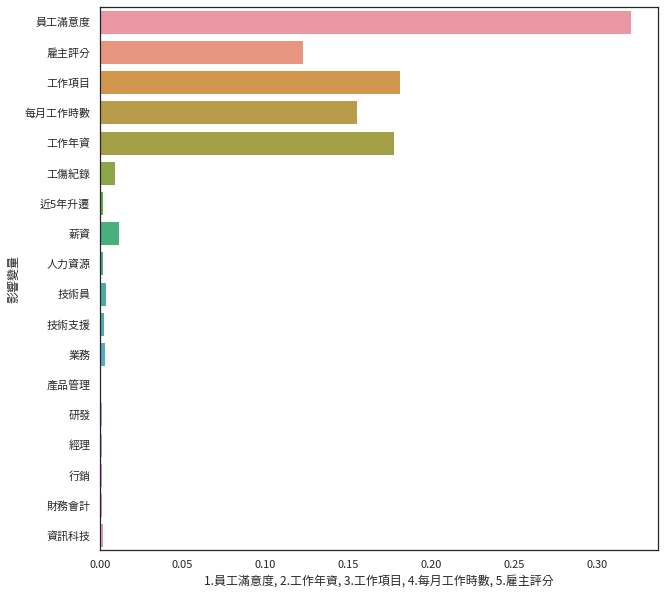

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x='1.員工滿意度, 2.工作年資, 3.工作項目, 4.每月工作時數, 5.雇主評分', y='影響變量', data=importances_df)

In [ ]:
print("1.員工滿意度, 2.工作年資, 3.工作項目, 4.每月工作時數, 5.雇主評分")

1.員工滿意度, 2.工作年資, 3.工作項目, 4.每月工作時數, 5.雇主評分


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14937 entries, 1 to 14937
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   員工滿意度   14937 non-null  float64
 1   雇主評分    14937 non-null  float64
 2   工作項目    14937 non-null  int64  
 3   每月工作時數  14937 non-null  int64  
 4   工作年資    14937 non-null  int64  
 5   工傷紀錄    14937 non-null  int64  
 6   在職中     14937 non-null  int64  
 7   近5年升遷   14937 non-null  int64  
 8   薪資      14937 non-null  int64  
 9   人力資源    14937 non-null  uint8  
 10  技術員     14937 non-null  uint8  
 11  技術支援    14937 non-null  uint8  
 12  業務      14937 non-null  uint8  
 13  產品管理    14937 non-null  uint8  
 14  研發      14937 non-null  uint8  
 15  經理      14937 non-null  uint8  
 16  行銷      14937 non-null  uint8  
 17  財務會計    14937 non-null  uint8  
 18  資訊科技    14937 non-null  uint8  
dtypes: float64(2), int64(7), uint8(10)
memory usage: 1.8 MB


In [ ]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from palettable import colorbrewer as cb 
from IPython.display import display


In [ ]:
df.shape

(14937, 19)

In [ ]:
print(df.薪資.value_counts())

1    7277
2    6423
3    1237
Name: 薪資, dtype: int64


In [ ]:
rfc = rfc(n_estimators=10)
Mr_x = cross_val_predict(rfc, X, y, cv=5,
                         method='predict_proba')
Mr_x = pd.DataFrame(Mr_x[0:,1])
Mr_x.columns = ['最可能離職員工']

In [ ]:
Mr_x_prob= pd.concat([df, Mr_x], axis=1)
Mr_x_prob= Mr_x_prob[(Mr_x_prob["在職中"] == 0)]
Mr_x_prob= Mr_x_prob[(Mr_x_prob["最可能離職員工"] >= 0.49)]
Mr_x_prob.sort_values(by='最可能離職員工', ascending=False, inplace=True)

In [ ]:
wl = Mr_x_prob[['員工滿意度','每月工作時數',
                 '工作年資', '工作項目',
                 '雇主評分','最可能離職員工']]

In [ ]:
wl.style.bar(subset=['最可能離職員工'], color='#d65f5f')

,員工滿意度,每月工作時數,工作年資,工作項目,雇主評分,最可能離職員工
14149,0.500000,180.000000,3.000000,4.000000,0.730000,1.000000
9719,0.820000,163.000000,2.000000,3.000000,0.740000,1.000000
6411,0.650000,182.000000,2.000000,4.000000,0.700000,1.000000
6303,0.160000,121.000000,2.000000,5.000000,0.820000,1.000000
6208,0.880000,226.000000,2.000000,4.000000,0.670000,1.000000
7707,0.490000,206.000000,2.000000,5.000000,0.790000,1.000000
11938,0.500000,180.000000,3.000000,4.000000,0.730000,1.000000
11918,0.520000,174.000000,3.000000,5.000000,0.550000,1.000000
7388,0.910000,117.000000,5.000000,4.000000,0.430000,1.000000
3746,0.510000,175.000000,3.000000,5.000000,0.600000,1.000000


In [ ]:
df_clf = pd.get_dummies(df)
df_clf.head()

,員工滿意度,雇主評分,工作項目,每月工作時數,工作年資,工傷紀錄,在職中,近5年升遷,薪資,人力資源,技術員,技術支援,業務,產品管理,研發,經理,行銷,財務會計,資訊科技
1,0.38,0.53,2,157,3,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,0.80,0.86,5,262,6,0,1,0,2,0,0,0,1,0,0,0,0,0,0
3,0.11,0.88,7,272,4,0,1,0,2,0,0,0,1,0,0,0,0,0,0
4,0.72,0.87,5,223,5,0,1,0,1,0,0,0,1,0,0,0,0,0,0
5,0.76,0.89,5,262,5,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
for key in (df.columns.values):
    print(key)

員工滿意度
雇主評分
工作項目
每月工作時數
工作年資
工傷紀錄
在職中
近5年升遷
薪資
人力資源
技術員
技術支援
業務
產品管理
研發
經理
行銷
財務會計
資訊科技


In [ ]:
labels =df_clf.columns
labels

Index(['員工滿意度', '雇主評分', '工作項目', '每月工作時數', '工作年資', '工傷紀錄', '在職中', '近5年升遷', '薪資',
       '人力資源', '技術員', '技術支援', '業務', '產品管理', '研發', '經理', '行銷', '財務會計', '資訊科技'],
      dtype='object')

In [ ]:
y = df_clf['在職中'].values

df_clf = df_clf.drop(['在職中'],axis=1)
X = df_clf.values

In [ ]:
from sklearn.preprocessing import StandardScaler
X= StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
def separator():
    print(" ")
    print('*********************************************************************')
    print(" ")

In [ ]:
def printz(predict_train,predict_test):
    
    print('Performance on Training Data')
    # 準確性
    print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, predict_train)))
    separator()
    
    print('Performance on Testing Data')
    # 訓練指標
    print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, predict_test)))
    print("Confusion Matrix")
    separator()
    
    print('Metrics')
    # 標籤的使用設置:1=True 到左上角和 0=False 到右下角
    print("{0}".format(metrics.confusion_matrix(y_test, predict_test, labels=[1, 0])))
    separator()
    print("Classification Report")
    print(metrics.classification_report(y_test, predict_test, labels=[1,0]))

In [ ]:
# 模型擬和
def modelz(model):
    model.fit(X_train, y_train.ravel())
    # 使用訓練數據預測值
    predict_train = model.predict(X_train)
    # 使用測試數據預測值
    predict_test = model.predict(X_test)
   
    printz(predict_train,predict_test)
    

In [ ]:
def classifierz(typz):

    # 創建用於訓練的模型並設置參數
    if typz==1:
        # 創建樸素貝氏分析器模型項目 Gaussian Naive Bayes model object
        model = GaussianNB()
        modelz(model)
        
    if typz==2:
        # 創建邏輯回歸模型 Logistic Regression model
        model =LogisticRegression(C=0.7, random_state=42)
        modelz(model)
        
    if typz==3:       
        # 創建隨機森林分類器模型 Random Forest Classifier model 
        model = RandomForestClassifier(random_state=42)
        modelz(model)
        
    if typz==4:
        # 創建梯度提升分類器模型Gradient Boosting Machine
        model = GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth=6)
        modelz(model)
        importances = pd.DataFrame({'feature':df_clf.columns,
                                    'importance':model.feature_importances_})
        importances = importances.sort_values('importance',ascending=False).set_index('feature')
        importances = importances[importances.importance>=0.1]
        importances.index = [x.strip().replace(' ', ' ') for x in importances.index]
        print (importances)
        importances.plot(kind = 'barh', x = importances.index, figsize = (10,4),
                         color='#d65f5f', legend=False, title = "Importance factors")

In [ ]:
clf_id = 1 # 1 to run the Naive bayes classifier 
classifierz(clf_id)

Performance on Training Data
Accuracy: 0.7459
 
*********************************************************************
 
Performance on Testing Data
Accuracy: 0.7403
Confusion Matrix
 
*********************************************************************
 
Metrics
[[ 828  248]
 [ 916 2490]]
 
*********************************************************************
 
Classification Report
              precision    recall  f1-score   support

           1       0.47      0.77      0.59      1076
           0       0.91      0.73      0.81      3406

    accuracy                           0.74      4482
   macro avg       0.69      0.75      0.70      4482
weighted avg       0.81      0.74      0.76      4482



In [ ]:
clf_id = 2 # 2 to run the logistic regression classifier 
classifierz(clf_id)

Performance on Training Data
Accuracy: 0.7923
 
*********************************************************************
 
Performance on Testing Data
Accuracy: 0.7869
Confusion Matrix
 
*********************************************************************
 
Metrics
[[ 370  706]
 [ 249 3157]]
 
*********************************************************************
 
Classification Report
              precision    recall  f1-score   support

           1       0.60      0.34      0.44      1076
           0       0.82      0.93      0.87      3406

    accuracy                           0.79      4482
   macro avg       0.71      0.64      0.65      4482
weighted avg       0.76      0.79      0.76      4482



In [ ]:
clf_id = 3 # 3 to run the random forest classifier 
classifierz(clf_id)

Performance on Training Data
Accuracy: 1.0000
 
*********************************************************************
 
Performance on Testing Data
Accuracy: 0.9913
Confusion Matrix
 
*********************************************************************
 
Metrics
[[1041   35]
 [   4 3402]]
 
*********************************************************************
 
Classification Report
              precision    recall  f1-score   support

           1       1.00      0.97      0.98      1076
           0       0.99      1.00      0.99      3406

    accuracy                           0.99      4482
   macro avg       0.99      0.98      0.99      4482
weighted avg       0.99      0.99      0.99      4482



In [ ]:
clf_id = 4 # 4 to run the gradient boosted regression trees
classifierz(clf_id)

Performance on Training Data
Accuracy: 0.9925
 
*********************************************************************
 
Performance on Testing Data
Accuracy: 0.9864
Confusion Matrix
 
*********************************************************************
 
Metrics
[[1028   48]
 [  13 3393]]
 
*********************************************************************
 
Classification Report
              precision    recall  f1-score   support

           1       0.99      0.96      0.97      1076
           0       0.99      1.00      0.99      3406

    accuracy                           0.99      4482
   macro avg       0.99      0.98      0.98      4482
weighted avg       0.99      0.99      0.99      4482

       importance
員工滿意度    0.514566
工作年資     0.153372
雇主評分     0.127699
工作項目     0.101973


KeyError: ignored